<a href="https://colab.research.google.com/github/jofebrian32/portfolio_da/blob/main/Valorant_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
player_data = pd.read_csv('/content/Players.csv')
df_player = player_data.copy()

In [3]:
df_player.head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [4]:
team_data = pd.read_csv('/content/Teams.csv')
df_team = team_data.copy()

In [5]:
df_team.head()

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,"$561,500"
1,2,Acend,5,1,1,1,"$498,859"
2,3,Gambit Esports,8,3,0,1,"$495,638"
3,4,Team Liquid,4,2,2,0,"$295,374"
4,5,G2 Esports,7,2,1,0,"$257,925"


In [12]:
df_player.isnull()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False


In [13]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      500 non-null    int64 
 1   Player    500 non-null    object
 2   Gold      500 non-null    int64 
 3   Silver    500 non-null    int64 
 4   Bronze    500 non-null    int64 
 5   S Tier    500 non-null    int64 
 6   Earnings  500 non-null    object
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


In [18]:
df_team.duplicated().sum()

0

In [14]:
df_team.isnull()

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
397,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False
400,False,False,False,False,False,False,False


In [20]:
df_team.duplicated().sum()

0

In [21]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      402 non-null    int64 
 1   Team      402 non-null    object
 2   Gold      402 non-null    int64 
 3   Silver    402 non-null    int64 
 4   Bronze    402 non-null    int64 
 5   S Tier    402 non-null    int64 
 6   Earnings  402 non-null    object
dtypes: int64(5), object(2)
memory usage: 22.1+ KB


In [22]:
df_player['Earnings'] = df_player['Earnings'].str.replace('$','').str.replace(',','')
df_player.head()

<ipython-input-22-57c5acc9a98a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_player['Earnings'] = df_player['Earnings'].str.replace('$','').str.replace(',','')


,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,113550
1,2,ShahZaM,13,4,1,1,113450
2,3,dapr,14,3,1,1,112870
3,4,SicK,12,3,1,1,112650
4,5,cNed,12,4,2,1,107735


In [27]:
df_player['Earnings'] = df_player['Earnings'].astype(int)

In [29]:
df_player.dtypes

Rank         int64
Player      object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings     int64
dtype: object

In [23]:
df_team['Earnings'] = df_team['Earnings'].str.replace('$','').str.replace(',','')
df_team.head()

<ipython-input-23-d232b9e025c6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_team['Earnings'] = df_team['Earnings'].str.replace('$','').str.replace(',','')


,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,561500
1,2,Acend,5,1,1,1,498859
2,3,Gambit Esports,8,3,0,1,495638
3,4,Team Liquid,4,2,2,0,295374
4,5,G2 Esports,7,2,1,0,257925


In [30]:
df_team['Earnings'] = df_team['Earnings'].astype(int)
df_team.dtypes

Rank         int64
Team        object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings     int64
dtype: object

In [42]:
#Players Analysis
print('Top 10 Players Based on Gold Medal (2020)')
df_player.head(10).sort_values(by=['Gold'], ascending = False)

Top 10 Players Based on Gold Medal (2020)


,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
2,3,dapr,14,3,1,1,112870
7,8,nAts,14,6,0,1,103829
0,1,zombs,13,5,1,1,113550
1,2,ShahZaM,13,4,1,1,113450
8,9,Chronicle,13,6,0,1,103574
3,4,SicK,12,3,1,1,112650
4,5,cNed,12,4,2,1,107735
5,6,starxo,12,4,1,1,104394
9,10,d3ffo,12,4,2,1,102773
6,7,Kiles,6,4,2,1,104093


In [43]:
print('Top 10 Teams based on Gold Medal (2020)')
df_team.head(10).sort_values(by=['Gold'], ascending = False)

Top 10 Teams based on Gold Medal (2020)


,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
7,8,Vision Strikers,17,0,0,0,224149
0,1,Sentinels,12,3,1,1,561500
2,3,Gambit Esports,8,3,0,1,495638
4,5,G2 Esports,7,2,1,0,257925
9,10,KRÜ Esports,7,3,1,0,191000
1,2,Acend,5,1,1,1,498859
3,4,Team Liquid,4,2,2,0,295374
5,6,Team Envy,2,2,2,0,251500
6,7,100 Thieves,2,3,2,0,225000
8,9,Fnatic,1,2,2,0,210888


In [50]:
df_player['TotalMedal'] = df_player['Gold']+df_player['Silver']+df_player['Bronze']
df_player.head(10).sort_values(by=['TotalMedal'],ascending=False)

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings,TotalMedal
7,8,nAts,14,6,0,1,103829,20
0,1,zombs,13,5,1,1,113550,19
8,9,Chronicle,13,6,0,1,103574,19
1,2,ShahZaM,13,4,1,1,113450,18
2,3,dapr,14,3,1,1,112870,18
4,5,cNed,12,4,2,1,107735,18
9,10,d3ffo,12,4,2,1,102773,18
5,6,starxo,12,4,1,1,104394,17
3,4,SicK,12,3,1,1,112650,16
6,7,Kiles,6,4,2,1,104093,12


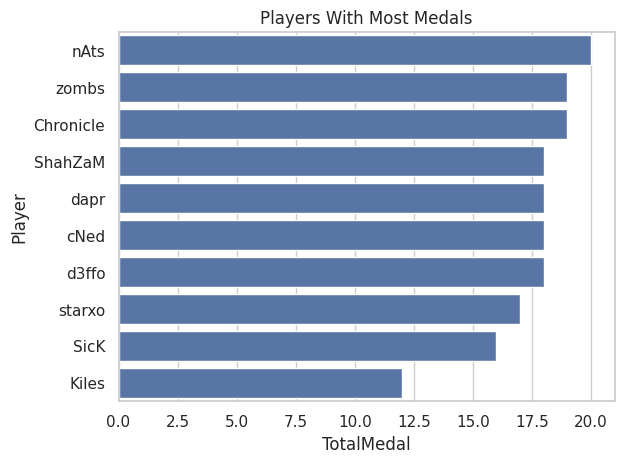

In [51]:
sns.barplot(data=df_player.head(10).sort_values(by=['TotalMedal'],ascending=False),x='TotalMedal',y='Player')
plt.title('Players With Most Medals')
plt.show()

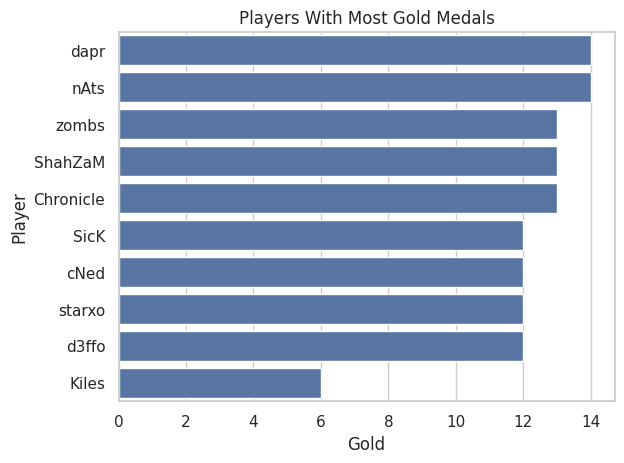

In [52]:
sns.barplot(data=df_player.head(10).sort_values(by=['Gold'],ascending=False),x='Gold',y='Player')
plt.title('Players With Most Gold Medals')
plt.show()

<ipython-input-55-51e73f54a1dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_player.corr(),annot=True)


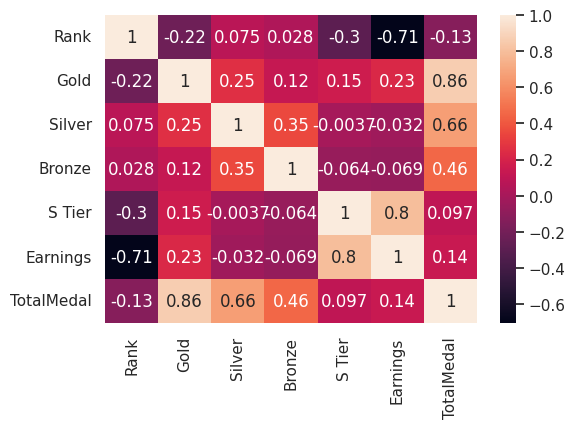

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(df_player.corr(),annot=True)
plt.show()

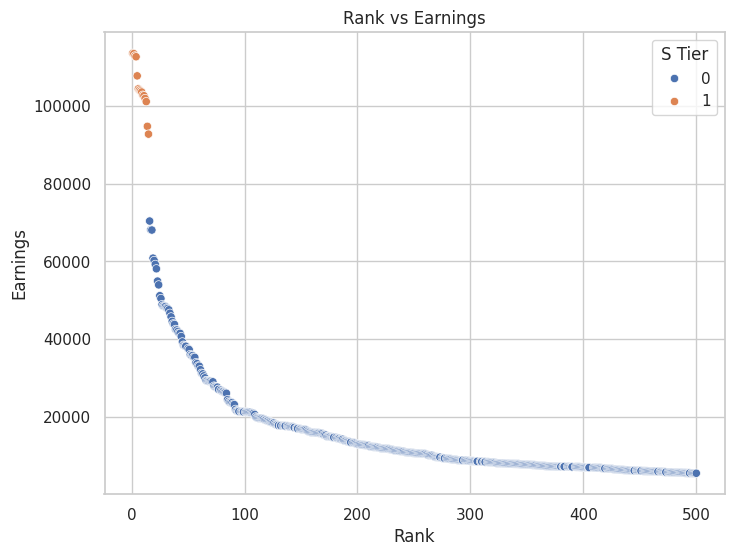

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_player,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()

In [64]:
df_player.head(20).sort_values(by=['S Tier'],ascending = False)

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings,TotalMedal
0,1,zombs,13,5,1,1,113550,19
8,9,Chronicle,13,6,0,1,103574,19
14,15,TenZ,8,4,3,1,92750,15
13,14,zeek,13,4,1,1,94754,18
12,13,Redgar,9,4,1,1,101115,14
11,12,BONECOLD,5,1,1,1,101918,7
1,2,ShahZaM,13,4,1,1,113450,18
9,10,d3ffo,12,4,2,1,102773,18
10,11,Sheydos,10,4,0,1,102626,14
7,8,nAts,14,6,0,1,103829,20


In [66]:
df_team['TotalMedal'] = df_team['Gold']+df_team['Silver']+df_team['Bronze']

In [67]:
df_team.head(10).sort_values(by=['TotalMedal'],ascending=False)

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings,TotalMedal
7,8,Vision Strikers,17,0,0,0,224149,17
0,1,Sentinels,12,3,1,1,561500,16
2,3,Gambit Esports,8,3,0,1,495638,11
9,10,KRÜ Esports,7,3,1,0,191000,11
4,5,G2 Esports,7,2,1,0,257925,10
3,4,Team Liquid,4,2,2,0,295374,8
1,2,Acend,5,1,1,1,498859,7
6,7,100 Thieves,2,3,2,0,225000,7
5,6,Team Envy,2,2,2,0,251500,6
8,9,Fnatic,1,2,2,0,210888,5


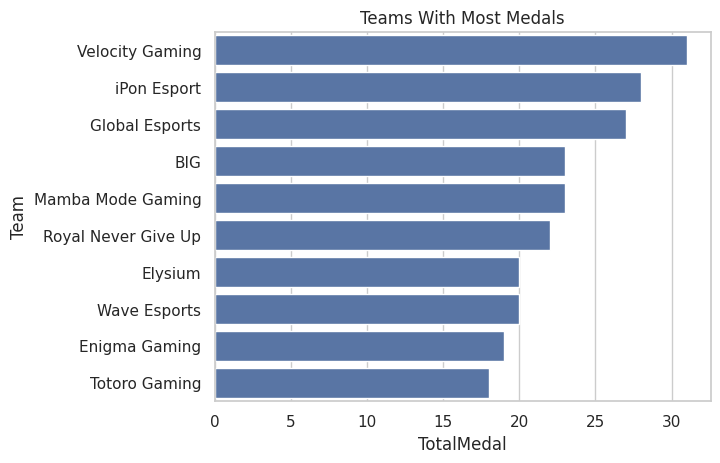

In [68]:
sns.barplot(data=df_team.sort_values(by='TotalMedal',ascending=False).head(10),x='TotalMedal',y='Team')
plt.title('Teams With Most Medals')
plt.show()

<ipython-input-69-0cf531fcf204>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_team.corr(),annot=True)


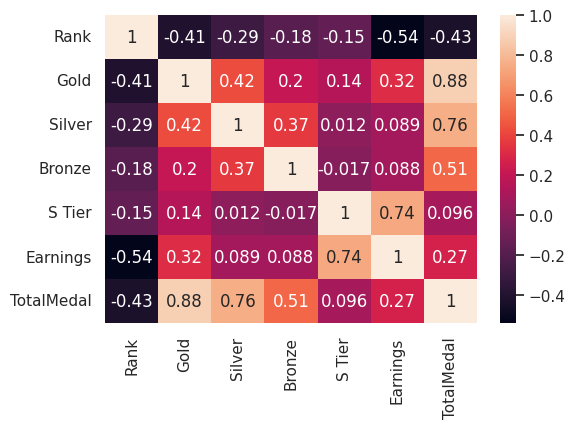

In [69]:
plt.figure(figsize=(6,4))
sns.heatmap(df_team.corr(),annot=True)
plt.show()

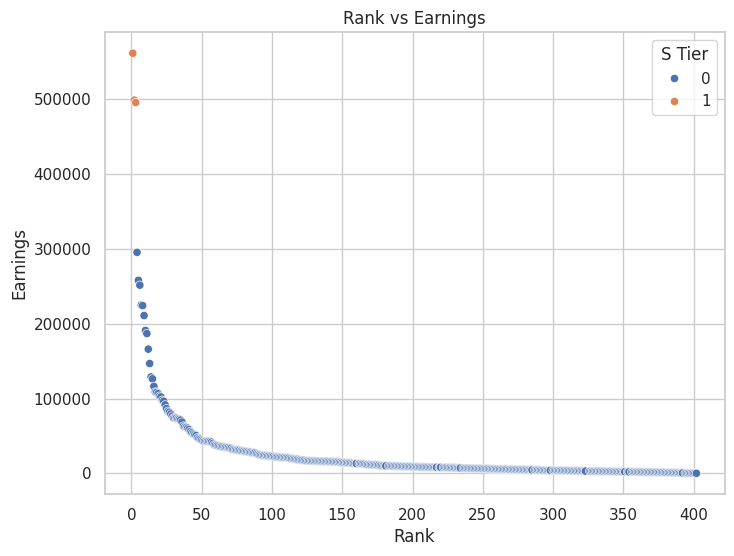

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_team,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()